# Inti Sari:

Dalam notebook ini, akan melakukan Exploratory Data Analysis (EDA) dengan Python. <br>
Tahapan:
1. Tampilan awal pada data
2. Data cleansing
3. Pemahaman mendalam tentang data

# Import Libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data:

In [2]:
# Meload datasets yg dibutuhkan:
df = pd.read_csv('airline_passenger_satisfaction.csv')

Datasetnya didapatkan dari Kaggle dan dapat didownload pada link: https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction

#  Tampilan Awal pada Data & Data Cleansing:

## Sample of Data:

In [4]:
# Menampilkan 5 baris data teratas
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


Dataset yg digunakan mengenai Skor kepuasan pelanggan dari 120.000+ penumpang maskapai penerbangan, termasuk informasi tambahan tentang setiap penumpang, penerbangan penumpang, dan jenis perjalanan, serta evaluasi berbagai faktor seperti kebersihan, kenyamanan, layanan, dan pengalaman keseluruhan.

**Keterangan Kolom:**
- ID: ID dari setiap penumpang (pax), dan hal ini bersifat unik (tidak ada yg sama).                       
- Gender: Jenis kelamin penumpang (pax)                               
- Age: Umur penumpang (pax)                                     
- Customer Type: Tipe penumpang (pax) apakah pertama kali menggunakan Airline tersebut atau sudah kesekian kali
- Type of Travel: Jenis perjalanan penumpang (pax) apakah melakukan perjalanan bisnis atau pribadi.             
- Class: Kelas yg digunakan penumpang ketika menggunakan airline tersebut apakah kelas business, Economy atau Economy Plus 
- Flight Distance: Jarak tempuh penerbangannya                          
- Departure Delay: Lama waktu keterlambatan keberangkatan dalam satuan menit                     
- Arrival Delay: Lama waktu keterlambatan kedatangan dalam satuan menit             
- Departure and Arrival Time Convenience: Kenyamanan Waktu Keberangkatan dan Kedatangan
- Ease of Online Booking: Kemudahan Pemesanan Tiket pesawat Online              
- Check-in Service: Layanan Check-in                   
- Online Boarding: Boarding Online                   
- Gate Location: Lokasi gate (pintu) masuk pesawat                  
- On-board Service: Pelayanan di Pesawat                 
- Seat Comfort: Kenyamanan Kursi                            
- Leg Room Service : Layanan jarak antar kursi di pesawat                     
- Cleanliness: Kebersihan armada atau pesawat yg ditumpangi                     
- Food and Drink: Makanan dan minuman                       
- In-flight Service: Pelayanan ketika Penerbangan                      
- In-flight Wifi Service: Pelayanan Wifi selama Penerbangan              
- In-flight Entertainment: Hiburan yg disediakan selama Penerbangan                
- Baggage Handling: Penanganan bagasi penumpang (pax)                     
- Satisfaction: Tingkat kepuasan penumpang terhadap maskapai tersebut                     

## Basic Data Cleansing:

## Informasi Umum & Missing Values:

In [5]:
# Mengetahui informasi kunci dari Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

Dari hasil informasi di atas, dapat diketahui bahwa:
- Datanya terdiri atas 24 kolom dan 129880 baris
- Hanya 1 kolom yg memiliki nilai yg mengalami _**Missing Values**_ yaitu kolom `Arrival Delay` dimana kolom yg mengalami Missing Value tersebut akan diatasi dengan didrop. Sehungga **tidak dilakukan imputasi** (mengganti Missing Value dengan suatu angka tertentu dalam hal ini median), mengingat dataset ini bertujuan untuk melakukan **EDA**, maka tidak dilakukan Imputasi karena dapat membuat analisis yg dilakukan menjadi bias atau tidak terlalu representatif yang dimana menyalahi tujuan utama dari EDA, yaitu untuk mendapatkan kesimpulan atau menginterpretasikan data secara sebaik-baiknya.
- Semua tipe (jenis) data sudah baik (sesuai), mengingat nama kolom yang sesuai.

In [6]:
# Menghitung jumlah Missing Values per kolom:
df.isna().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [9]:
# Menghitung persentase data dari Jumlah Missing Values per Kolom:
df.isna().sum() * 100 / len(df)

ID                                        0.000000
Gender                                    0.000000
Age                                       0.000000
Customer Type                             0.000000
Type of Travel                            0.000000
Class                                     0.000000
Flight Distance                           0.000000
Departure Delay                           0.000000
Arrival Delay                             0.302587
Departure and Arrival Time Convenience    0.000000
Ease of Online Booking                    0.000000
Check-in Service                          0.000000
Online Boarding                           0.000000
Gate Location                             0.000000
On-board Service                          0.000000
Seat Comfort                              0.000000
Leg Room Service                          0.000000
Cleanliness                               0.000000
Food and Drink                            0.000000
In-flight Service              

Dapat dilihat bahwa dari kolom yg terdapat Missing Values persentasenya tidak sampai 1% (sangat kecil), sehingga dapat menghapus (mendrop) baris yg mengandung Missing Values.

In [10]:
# Proporsi Missing Values secara Keseluruhan dengan Mempertimbangkan Semua Kolom
((df.shape[0] - df.dropna().shape[0]) / df.shape[0]) * 100

0.3025870033877425

Dari semua kolom, juga hanya 0.3% (< 1%) Missing Value nya sehingga tidak terlalu banyak, jadi aman untuk didrop (hapus) Missing Value nya.

### Drop Missing Values:

In [38]:
# Drop NA Values
df = df.dropna()

In [39]:
# Memeriksa kembali Missing Values setelah didrop:
df.isna().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

Dengan demikian sudah berhasil membuang Missing Value.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129487 non-null  int64  
 1   Gender                                  129487 non-null  object 
 2   Age                                     129487 non-null  int64  
 3   Customer Type                           129487 non-null  object 
 4   Type of Travel                          129487 non-null  object 
 5   Class                                   129487 non-null  object 
 6   Flight Distance                         129487 non-null  int64  
 7   Departure Delay                         129487 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129487 non-null  int64  
 10  Ease of Online Booking                  1294

Setelah dicleansing, tersisa 129487 baris di dalam dataset.

## Memeriksa Data Duplicat:

In [40]:
# Memeriksa Jumlah Baris Duplikat:
df.duplicated().sum()

0

Tidak terdapat baris yg terduplikat, sehingga tidak perlu melakukan drop.

# Data Understanding:

## Statistical Summary:

In [42]:
# Mengelompokkan nama kolomnya menjadi berdasarkan jenis
# Karena akan mempermudah pengerjaan ke depannya
categoricals = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']

numericals = ['ID', 'Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience',
              'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service',
              'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 
              'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']

#### A. Kolom Numeric:

In [43]:
# Melihat statistical summary kolom numeric dengan syntax:
df[numericals].describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,64958.335169,39.428761,1190.210662,14.643385,15.091129,3.057349,2.756786,3.306239,3.252720,2.976909,3.383204,3.441589,3.351078,3.286222,3.204685,3.642373,2.728544,3.358067,3.631886
std,37489.781165,15.117597,997.560954,37.932867,38.465650,1.526787,1.401662,1.266146,1.350651,1.278506,1.287032,1.319168,1.316132,1.313624,1.329905,1.176614,1.329235,1.334149,1.180082
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32494.500000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64972.000000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97415.500000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Yg perlu diperhatikan atau dicatat dalam EDA nya, antara lain:<br>

1. Melihat nilai Min dan Max nya apakah masuk akal**.<br>
Dari hasil di atas, secara keseluruhan nilai minimum dan maksimum untuk semua kolom tampak masuk akal. <br>
2. Tidak terdapat kolom boolean/biner (yg nilainya 0 atau 1), sehingga dapat disimpulkan simetrisitasnya semua.
3. `Departure and Arrival Time Convenience`, `Ease of Online Booking`, `Check-in Service`, `Online Boarding`, `Gate Location`, `On-board Service`, `Seat Comfort`, `Leg Room Service`, `Cleanliness`, `Food and Drink`, `In-flight Service`, `In-flight Wifi Service`, `In-flight Entertainment` dan `Baggage Handling` adalah nilai diskrit dengan tidak banyak nilai unik, maka tidak perlu menyimpulkan simetrisitasnya.
4. Rata-rata (Mean) ~ 50% (Median) dalam kolom `Age`, `Departure Delay` dan `Arrival Delay`. Terutama pada kolom `Age` memiliki nilai rata-rata (mean) sebesar 39.4 dan mediannya bernilai 40.0 dan itu nilainya sangat dekat, jadi dapat disimpulkan bahwa kolom Age sepertinya memiliki distribusi yg cukup simetris.
5. Pada kolom `Flight Distance` memiliki nilai mean (rata-rata) sebesar 1190.21 sedangkan nilai tengah (median) nya sebesar 844.0, jadi terdapat perbedaan yg agak signifikan. Sehingga disimpulkan bahwa kolom `Flight Distance` sepertinya memiliki distribusi yg tidak simetris (skewed).

#### B. Kolom Categorical:

In [44]:
# Melihat statistical summary kolom Kategorik dengan syntax:
df[categoricals].describe()

,Gender,Customer Type,Type of Travel,Class,Satisfaction
count,129487,129487,129487,129487,129487
unique,2,2,2,3,2
top,Female,Returning,Business,Business,Neutral or Dissatisfied
freq,65703,105773,89445,61990,73225


In [46]:
df['Satisfaction'].unique()

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

Hasil Pengamatan:
- `Gender`, `Customer Type`, `Type of Travel` dan `Satisfaction`memiliki 2 nilai unik sedangkan `Class` memiliki 3 nilai unik.
- Sebagian besar penumpang (pax) berjenis kelamin perempuan.
- Sebagian besar penumpang (pax) sudah kesekian kali menggunakan maskapai tersebut, dalam hal ini dapat dikatakan sebagai penumpang setia karena sudah lebih dari 1x menggunakan maskapai tersebut.
- Sebagian besar jenis perjalanan penumpang (pax) adalah untuk melakukan perjalanan bisnis.
- Sebagian besar kelas yg digunakan penumpang ketika menggunakan airline tersebut adalah kelas business, hal ini sesuai dengan sebagian besar penumpang melakukan perjalanan untuk kepentingan bisnis.
- Sebagian besar tingkat kepuasan penumpang terhadap maskapai yg digunakan yaitu Netral atau Tidak Puas sebanyak sekitar 56% (73225/129487 * 100) dan sisanya merasa puas.

In [47]:
# Menunjukkan jumlah nilai yang tepat
# kode ini sangat berguna karena memiliki beberapa kolom kategoris
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of Gender column
Female    65703
Male      63784
Name: Gender, dtype: int64 

Value counts of Customer Type column
Returning     105773
First-time     23714
Name: Customer Type, dtype: int64 

Value counts of Type of Travel column
Business    89445
Personal    40042
Name: Type of Travel, dtype: int64 

Value counts of Class column
Business        61990
Economy         58117
Economy Plus     9380
Name: Class, dtype: int64 

Value counts of Satisfaction column
Neutral or Dissatisfied    73225
Satisfied                  56262
Name: Satisfaction, dtype: int64 



# Univariate Analysis:

#### A. Kolom Numeric:

## 1. Mendeteksi Outliers dengan Boxplot:

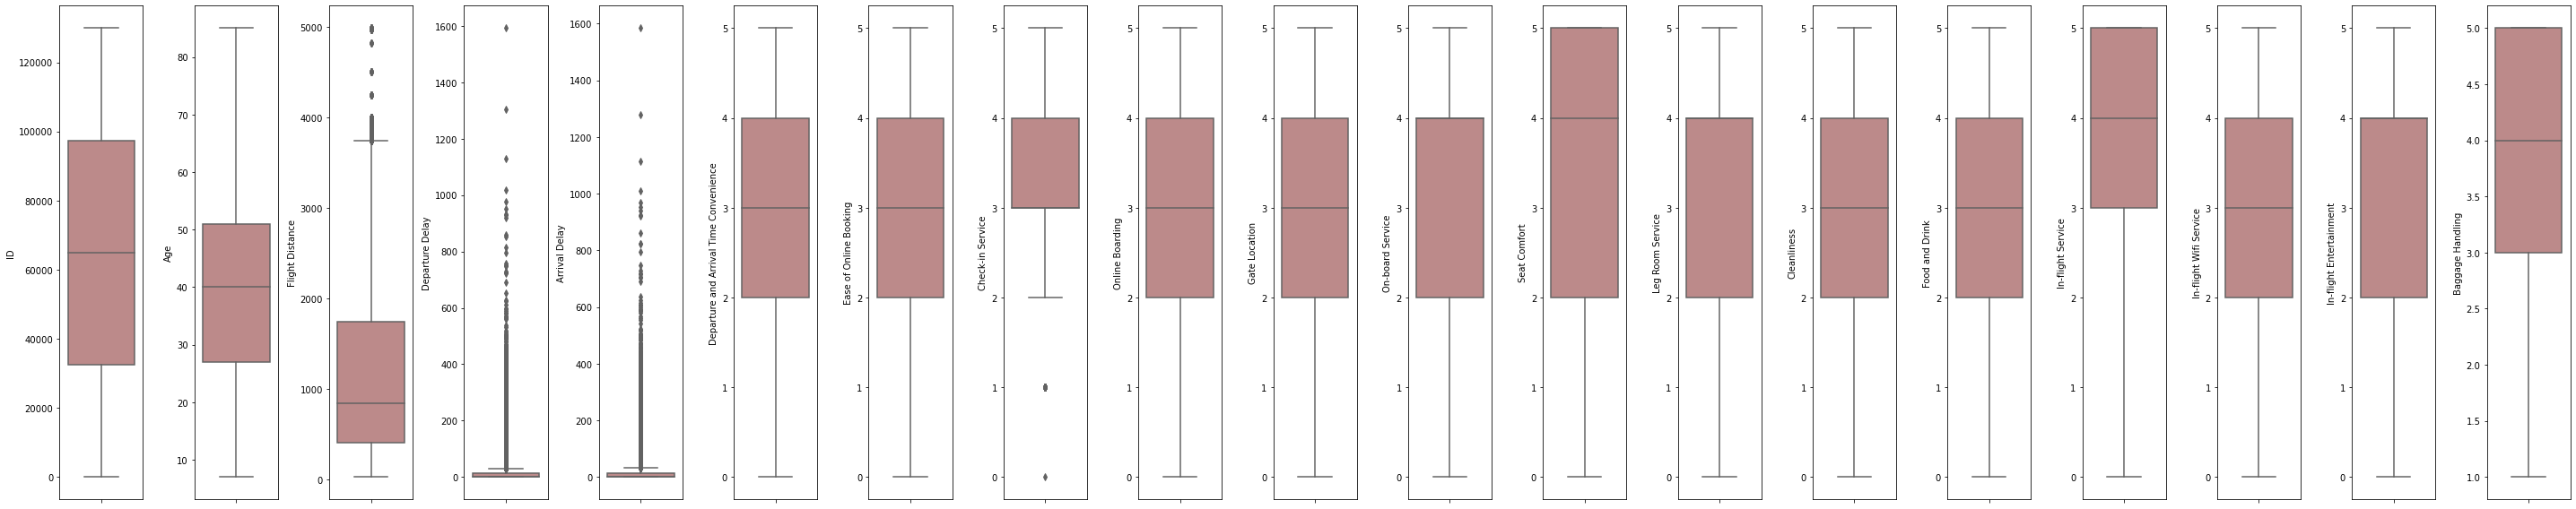

In [85]:
# Menyesuaikan ukuran gambar agar keterbacaan yang lebih baik
plt.figure(figsize = (40, 8))

# Memplotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y = df[features[i]], color = '#c48282')
    plt.tight_layout()

Dari hasil Boxplot untuk setiap kolom numerik, secara keseluruhan tidak terdapat Outlier, kecuali pada 4 kolom, antara lain kolom `Flight Distance`, `Departure Delay`,	`Arrival Delay` dan `Check-in Service`. Outlier pada kolom `Flight Distance` tidak layak untuk dihapus, karena tidak berpotensi untuk membiaskan analisis karena dalam skala jarak jika mendapatkan nilai 5000 itu sangat mungkin terjadi dan juga outlier pada kolom `Check-in Service` karena dalam skala 0-5 jika mendapatkan nilai 0 dan 1 itu sangat mungkin terjadi jadi tidak ada keharusan bagi outlier tersebut untuk didrop (penanganan khusus). Sedangkan outlier pada kolom `Departure Delay` dan `Arrival Delay` juga tidak layak untuk dihapus karena outlier tersebut merupakan sebuah fakta, berarti diperlukan sebuah penangan khusus agar waktu delay nya tidak terlalu lama.

In [94]:
# Untuk Memastikan profil lengkap Outlier 1:
outlier1 = df['Flight Distance'].max()

df[df['Flight Distance'] == outlier]

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
27490,27491,Male,52,Returning,Business,Business,1592,0,0.0,5,...,1,2,1,2,4,1,0,1,1,Satisfied
49363,49364,Male,51,Returning,Business,Business,1592,0,0.0,5,...,2,3,2,1,3,2,0,2,2,Satisfied
69217,69218,Male,55,Returning,Business,Business,1592,0,0.0,2,...,5,4,5,3,4,5,2,5,5,Satisfied
69835,69836,Male,38,Returning,Business,Business,1592,0,0.0,4,...,2,3,2,4,3,2,2,2,2,Neutral or Dissatisfied
70236,70237,Female,39,Returning,Business,Business,1592,14,19.0,3,...,4,4,4,5,3,4,3,4,4,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113875,113876,Male,39,Returning,Personal,Economy,1592,0,0.0,4,...,2,3,1,3,3,4,3,3,3,Neutral or Dissatisfied
113876,113877,Male,68,Returning,Personal,Economy,1592,6,1.0,5,...,3,2,5,3,3,5,3,3,5,Neutral or Dissatisfied
113879,113880,Male,67,Returning,Personal,Economy Plus,1592,4,0.0,4,...,4,1,5,1,1,5,2,1,5,Neutral or Dissatisfied
113880,113881,Female,38,Returning,Personal,Economy Plus,1592,26,21.0,5,...,3,4,5,4,4,5,1,4,4,Neutral or Dissatisfied


In [95]:
# Untuk Memastikan profil lengkap Outlier 2:
outlier2 = df['Departure Delay'].max()

df[df['Departure Delay'] == outlier]

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
73470,73471,Female,47,Returning,Personal,Economy,1120,1592,1584.0,2,...,4,2,4,2,2,3,2,2,4,Neutral or Dissatisfied


In [100]:
# Untuk Memastikan profil lengkap Outlier 3:
outlier3 = df['Arrival Delay'].max()

df[df['Arrival Delay'] == outlier]

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction


In [102]:
# Untuk Memastikan profil lengkap Outlier 4:
outlier4 = df['Check-in Service'].min()

df[df['Check-in Service'] == outlier]

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction


Bingung kenapa outlier 3 dan 4 tidak muncul hasilnya.

## 2. Plot KDE untuk Mengetahui Bentuk Distribusi

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

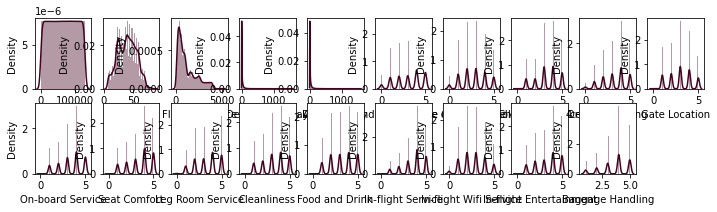

In [112]:
plt.figure(figsize=(12, 6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(4, len(features)//2 + 1, i+1)
    sns.distplot(x = df[features[i]], color='#420420')
    plt.xlabel(features[i])
    #plt.tight_layout()